In [1]:
!pip install torchmetrics
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms
# from torchmetrics.classification import BinaryF1Score, BinaryAccuracy, BinaryPrecision
# from torch.optim.lr_scheduler import StepLR

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 KB 10.9 MB/s eta 0:00:00


In [2]:
!pip install datasets
from datasets import load_dataset
DS = load_dataset("scene_parse_150")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 20.6 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/20210 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3352 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset scene_parse_150 downloaded and prepared to /root/.cache/huggingface/datasets/scene_parse_150/scene_parsing/1.0.0/d998c54e1b5c5bad12b4d2ec7e1a5f74eee4c153bc1b089a0001677ae9b3fd75. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
print(len(DS["train"]))
DS

20210


DatasetDict({
    train: Dataset({
        features: ['image', 'annotation', 'scene_category'],
        num_rows: 20210
    })
    test: Dataset({
        features: ['image', 'annotation', 'scene_category'],
        num_rows: 3352
    })
    validation: Dataset({
        features: ['image', 'annotation', 'scene_category'],
        num_rows: 2000
    })
})

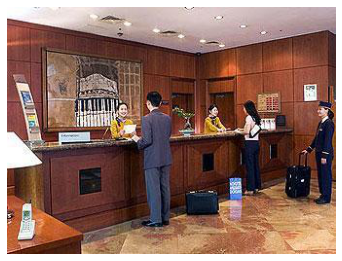

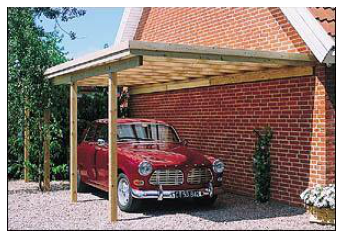

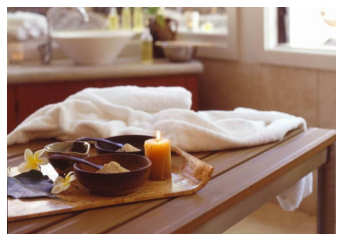

In [ ]:
samples=np.random.randint(len(DS["train"]),size=(3))
for i,index in zip(range(1,4),samples):
  plt.figure(figsize=[20,20])
  plt.subplot(1,3,i)
  plt.imshow(DS["train"][index.item()]["image"])
  plt.axis('off')
  plt.show()

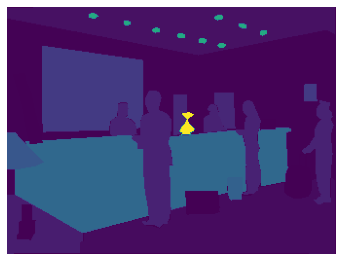

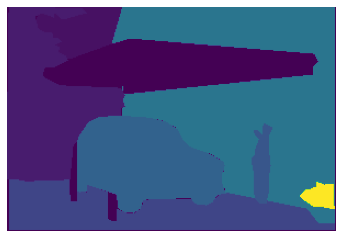

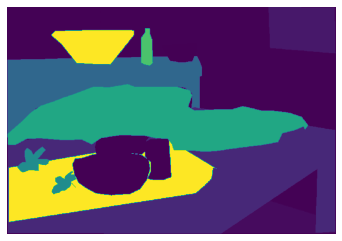

In [ ]:
for i,index in zip(range(1,4),samples):
  plt.figure(figsize=[20,20])
  plt.subplot(1,3,i)
  plt.imshow(DS["train"][index.item()]["annotation"])
  plt.axis('off')
  plt.show()

In [7]:
!pip install transformers
from transformers import AutoFeatureExtractor, BeitForSemanticSegmentation
from PIL import Image
import requests
feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/beit-base-finetuned-ade-640-640")
model = BeitForSemanticSegmentation.from_pretrained("microsoft/beit-base-finetuned-ade-640-640")
pars=sum(p.numel() for p in model.parameters())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Downloading:   0%|          | 0.00/276 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/900M [00:00<?, ?B/s]

In [ ]:
print(pars)
model.parameters

163407980


<bound method Module.parameters of BeitForSemanticSegmentation(
  (beit): BeitModel(
    (embeddings): BeitEmbeddings(
      (patch_embeddings): BeitPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): BeitEncoder(
      (layer): ModuleList(
        (0): BeitLayer(
          (attention): BeitAttention(
            (attention): BeitSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
              (relative_position_bias): BeitRelativePositionBias()
            )
            (output): BeitSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
    

In [ ]:
inputs0 = feature_extractor(images=DS["train"][samples[0].item()]["image"], return_tensors="pt")
outputs0 = model(**inputs0)

In [ ]:
inputs1 = feature_extractor(images=DS["train"][samples[1].item()]["image"], return_tensors="pt")
outputs1 = model(**inputs1)

In [ ]:
inputs2 = feature_extractor(images=DS["train"][samples[2].item()]["image"], return_tensors="pt")
outputs2 = model(**inputs2)

In [ ]:
logits=outputs0.logits
logits1=outputs1.logits
logits2=outputs2.logits

In [ ]:
import PIL
def tensor_to_image(tensor):
    tensor=tensor.squeeze(0)
    tensor=tensor.squeeze(0)
    tensor_min, _ = torch.min(tensor, dim=1, keepdim=True)
    tensor_max, _ = torch.max(tensor, dim=1, keepdim=True)
    tensor = (tensor - tensor_min) / (tensor_max - tensor_min)
    tensor= tensor.detach().numpy()
    return PIL.Image.fromarray((tensor[0] * 255).astype(np.uint8))

In [ ]:
y=tensor_to_image(logits)
y1=tensor_to_image(logits1)
y2=tensor_to_image(logits2)

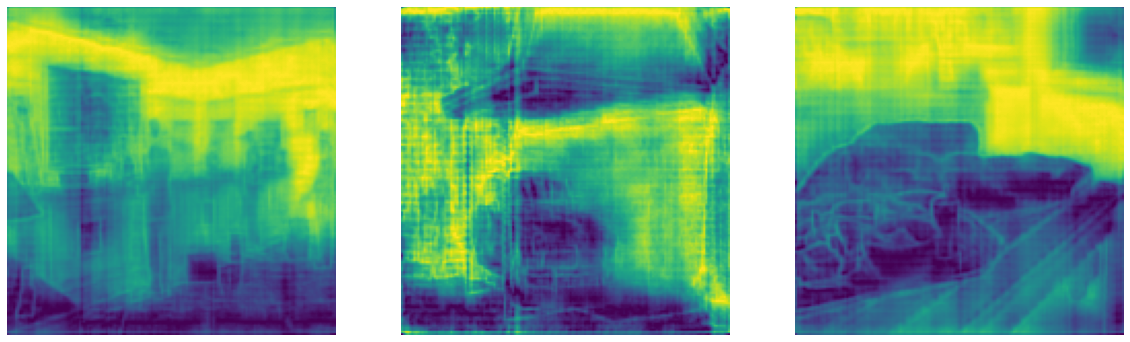

In [ ]:
  plt.figure(figsize=[20,20])
  plt.subplot(1,3,1)
  plt.imshow(y)
  plt.axis('off')
  plt.subplot(1,3,2)
  plt.imshow(y1)
  plt.axis('off')
  plt.subplot(1,3,3)
  plt.imshow(y2)
  plt.axis('off')
  plt.show()

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="scene-parse-150",
    learning_rate=6e-5,
    num_train_epochs=5,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    save_total_limit=3,
    evaluation_strategy="steps",
    save_strategy="steps",
    save_steps=20,
    eval_steps=20,
    logging_steps=1,
    eval_accumulation_steps=5,
    remove_unused_columns=False
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=feature_extractor(images=DS["train"][:]["image"], return_tensors="pt"),
    eval_dataset=feature_extractor(images=DS["validation"][:]["image"], return_tensors="pt"),
)

trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
